In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

In [2]:
df = pd.read_csv(r'D:\Data Analyst stuffs\Python stuffs\Learn Python for Data Analysis\PYTHON_EXERCISES_UDEMY\Bitcoin Case Study\bitcoin_price_Training - Training.csv')

df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date').sort_index()

# Clean 'Volume' column:
# Remove commas (thousand separators) → convert to numeric → replace missing values with zero
df['Volume'] = pd.to_numeric(df['Volume'].str.replace(',', '', regex=False), errors='coerce')
df['Volume'] = df['Volume'].fillna(0)

# Focus analysis on 2014–2017 (exclude 2013 because the data for that year is incomplete)
df_2014_2017 = df.loc[df.index.strftime('%Y') != '2013'].copy()

# Compute daily close-to-close returns as percentage change
df_2014_2017['Close_return'] = 100 * df_2014_2017['Close'].pct_change()

# Calculate correlation between trading volume and daily returns
pearson_val = (
    df_2014_2017[['Volume', 'Close_return']]
    .corr(method='pearson')
    .loc['Volume', 'Close_return']
)

spearman_val = (
    df_2014_2017[['Volume', 'Close_return']]
    .corr(method='spearman')
    .loc['Volume', 'Close_return']
)

# Create scatter plot: Volume (log scale) vs Daily Returns
fig_scatter = go.Scatter(   
    x=np.log10(df_2014_2017['Volume']), # log scale reduces skew in Volume data
    y=df_2014_2017['Close_return'],
    mode='markers',
    marker=dict(size=6, color='blue', opacity=0.6)
)

# Build figure
fig = go.Figure(fig_scatter)

# Customize layout
fig.update_layout(
    height=600,
    width=1000,
    title=f'Relationship Between Daily Trading Volume and Bitcoin Daily Returns<br><sub>Pearson={pearson_val:.3f}, Spearman={spearman_val:.3f}</sub>',
    xaxis_title='Logarithmic Scale of Daily Trading Volume (BTC)',
    yaxis_title='Daily Close-to-Close Returns (%)',
    template='plotly_white'
)

fig.show()

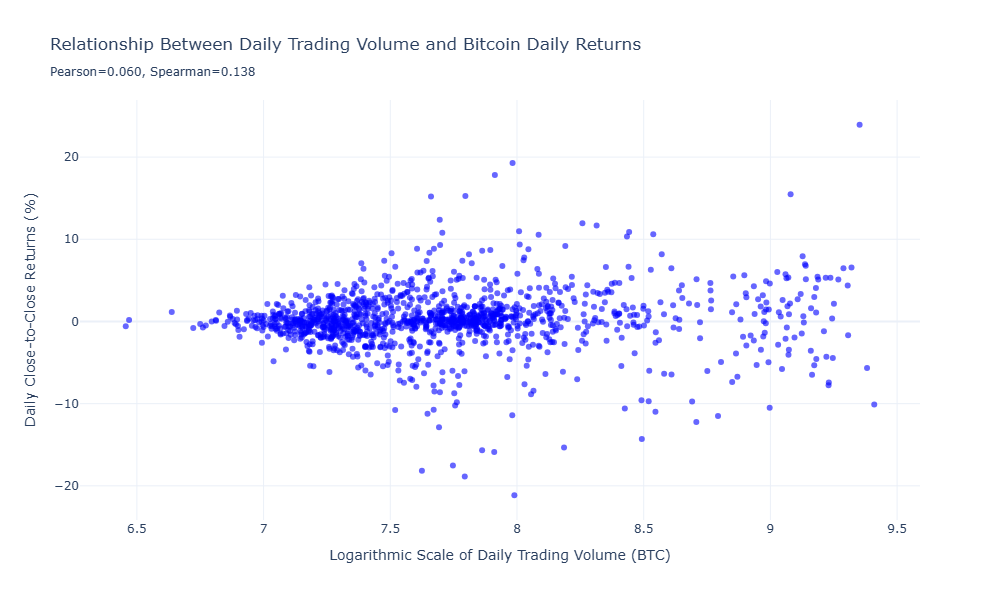

In [3]:
# Display the saved plot as a static image as Plotly interactive charts cannot be rendered directly on GitHub

from IPython.display import Image

Image(
    filename=r'D:\Data Analyst stuffs\Python stuffs\Learn Python for Data Analysis\PYTHON_EXERCISES_UDEMY\Bitcoin Case Study\Own_Exercises\Return_Volume_Correlation_Analysis.png'
) 